In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
# Load the dataset
file_path = 'Wine.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path)

In [25]:
data=pd.read_csv("Wine.csv")

In [26]:
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Head:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1 

In [27]:
# Check if 'Wine' is in the columns. If not, try using another column for classification.
target_column = 'Wine' if 'Wine' in data.columns else data.columns[0]  # Assume first column is target if not labeled 'Wine'

In [28]:
# Step 4: Separate Features and Target Variable
X = data.drop(target_column, axis=1)  # Features
y = data[target_column]               # Target

In [29]:
# Step 5: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Step 6: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

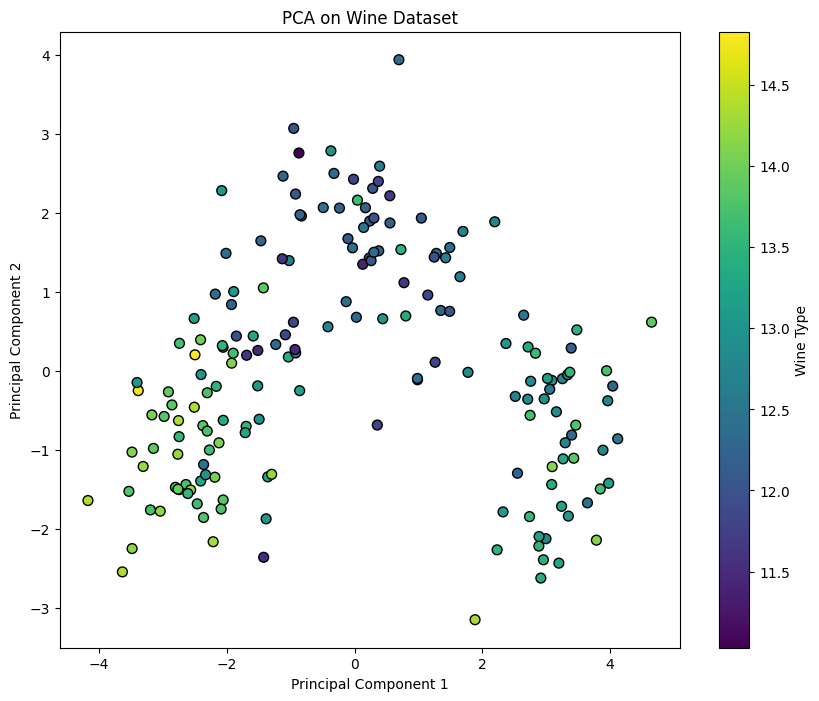

In [31]:
# Step 7: Visualize the First Two Principal Components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.colorbar(scatter, label='Wine Type')
plt.show()

In [32]:
# Step 8: Explained Variance
print("Explained Variance by Component:")
print(pca.explained_variance_ratio_)

Explained Variance by Component:
[0.41957898 0.15585708]


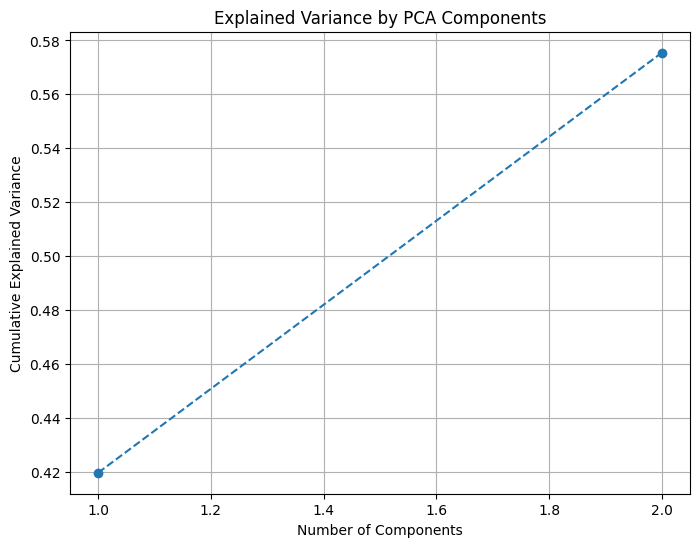

In [33]:
# Step 9: Cumulative Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()